In [49]:
import os
import json
import requests
import pandas as pd
import numpy as np
import datetime
from copy import deepcopy

* Base url for api call for each user.

In [9]:
# give information about user's submission history
URL1 = "https://codeforces.com/api/user.status?handle="
# give informaiton about user's competition history
URL2 = "https://codeforces.com/api/user.rating?handle="

* Helper function to retrive data from server

In [10]:
def getSubData(uname):
    return json.loads(requests.get(URL1 + uname).content)['result']

def getCompiData(uname):
    return json.loads(requests.get(URL2 + uname).content)['result']

In [158]:
user = 'tourist'
subData = getSubData(user)
compiData = getCompiData(user)

In [159]:
print("Total Number of sumbission for user %s is %d" % (user,len(subData)))

Total Number of sumbission for user tourist is 1949


In [160]:
print("Total Number of compitition participated for user %s is %d" % (user,len(compiData)))

Total Number of compitition participated for user tourist is 148


# Data Mapping and Transformation

In [161]:
subData[1]

{'id': 52404688,
 'contestId': 1119,
 'creationTimeSeconds': 1554555169,
 'relativeTimeSeconds': 4669,
 'problem': {'contestId': 1119,
  'index': 'F',
  'name': 'Niyaz and Small Degrees',
  'type': 'PROGRAMMING',
  'points': 3250.0,
  'tags': ['data structures', 'dp', 'trees']},
 'author': {'contestId': 1119,
  'members': [{'handle': 'tourist'}],
  'participantType': 'CONTESTANT',
  'ghost': False,
  'room': 33,
  'startTimeSeconds': 1554550500},
 'programmingLanguage': 'GNU C++17',
 'verdict': 'WRONG_ANSWER',
 'testset': 'PRETESTS',
 'passedTestCount': 4,
 'timeConsumedMillis': 46,
 'memoryConsumedBytes': 3174400}

In [143]:
subData[0]

{'id': 50671229,
 'contestId': 958,
 'creationTimeSeconds': 1551510346,
 'relativeTimeSeconds': 2147483647,
 'problem': {'contestId': 958,
  'index': 'D1',
  'name': 'Hyperspace Jump (easy)',
  'type': 'PROGRAMMING',
  'rating': 1500,
  'tags': ['expression parsing', 'math']},
 'author': {'contestId': 958,
  'members': [{'handle': 'poojanpatel101'}],
  'participantType': 'PRACTICE',
  'ghost': False,
  'startTimeSeconds': 1523689500},
 'programmingLanguage': 'GNU C++14',
 'verdict': 'WRONG_ANSWER',
 'testset': 'TESTS',
 'passedTestCount': 4,
 'timeConsumedMillis': 15,
 'memoryConsumedBytes': 204800}

In [187]:
# map compiData based on their contesId
def mapCompiData(cdata):
    data = {}
    cdata_copy = deepcopy(cdata)
    for row in cdata_copy:
        id_ = row.pop('contestId')
        data[id_] = row
    return data

In [188]:
def mapSubmissions(sdata):
    data = {}
    sdata_copy = deepcopy(sdata)
    for sub in sdata_copy:
        name = str(sub['problem']['contestId']) + "_" + sub['problem']['index']
        if name not in data:
            data[name] = []
        data[name].append(sub)
    return data

In [164]:
mapped_sub_data = mapSubmissions(subData)

In [184]:
l = set()
for s in subData:
    l.add(s['author']['participantType'])
print(l)

{'PRACTICE', 'OUT_OF_COMPETITION', 'CONTESTANT', 'VIRTUAL'}


In [189]:
# adding each submission to corresponding compitition
def addSubToContest(cdata, sdata):
    contest_submissions = [d for d in sdata if d['author']['participantType'] in ['CONTESTANT', 'OUT_OF_COMPETITION'] ]
    cdata_copy = deepcopy(cdata)
    for sub in contest_submissions:
        if sub['contestId'] not in cdata_copy:
            continue
        contest = cdata_copy[sub['contestId']]
        
        if 'submissions' not in contest:
            contest['submissions'] = []
        contest['submissions'].append(sub)
    return cdata_copy

In [190]:
full_contest_data = addSubToContest(mapCompiData(compiData), subData)

In [178]:
full_contest_data[335]

{'contestName': 'MemSQL start[c]up Round 2 - online version',
 'handle': 'tourist',
 'rank': 1,
 'ratingUpdateTimeSeconds': 1375560000,
 'oldRating': 3072,
 'newRating': 3121}

In [191]:
for k,c in full_contest_data.items():
    if 'submissions' not in c:
        print(k)

In [195]:
ll = [(k,len(v['submissions']), v['contestName'], v['newRating']) for k,v in full_contest_data.items()]
ll.sort( key=lambda x:x[1], reverse=True)

In [196]:
ll

[(316, 28, 'ABBYY Cup 3.0', 3195),
 (513, 20, 'Rockethon 2015', 3239),
 (643, 14, 'VK Cup 2016 - Round 3', 3554),
 (10, 12, 'Codeforces Beta Round #10', 1878),
 (87, 12, 'Codeforces Beta Round #73 (Div. 1 Only)', 2632),
 (2, 11, 'Codeforces Beta Round #2', 1602),
 (13, 11, 'Codeforces Beta Round #13', 1967),
 (23, 11, 'Codeforces Beta Round #23', 2081),
 (86, 11, 'Yandex.Algorithm 2011<br>Round 2', 2624),
 (120, 11, 'School Regional Team Contest, Saratov, 2011', 2635),
 (331, 11, 'ABBYY Cup 3.0 - Finals (online version)', 3136),
 (776,
  11,
  'ICM Technex 2017 and Codeforces Round #400 (Div. 1 + Div. 2, combined)',
  3534),
 (799,
  11,
  'Playrix Codescapes Cup (Codeforces Round #413, rated, Div. 1 + Div. 2)',
  3602),
 (1043, 11, 'Codeforces Round #519 by Botan Investments', 3312),
 (38,
  10,
  'School Personal Contest #1 (Winter Computer School 2010/11)<br/>-<br/>Codeforces Beta Round #38 (ACM-ICPC Rules)',
  2270),
 (611, 10, 'Good Bye 2015', 3444),
 (633, 10, 'Manthan, Codefest 

In [133]:
pd.Series?

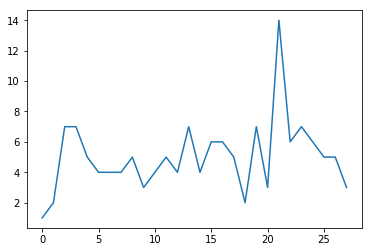

In [141]:
pd.Series(data=[len(v['submissions']) for k,v in full_contest_data.items()]).plot()

In [122]:
compiData[0]

{'contestId': 689,
 'contestName': 'Codeforces Round #361 (Div. 2)',
 'handle': 'poojanpatel101',
 'rank': 1600,
 'ratingUpdateTimeSeconds': 1467830100,
 'oldRating': 1500,
 'newRating': 1399}

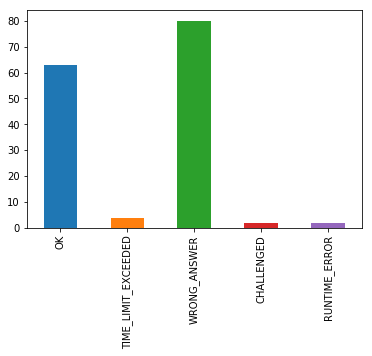

In [59]:
pd.Series(verd).plot(kind='bar')

In [19]:
compiData[0]

{'contestId': 689,
 'contestName': 'Codeforces Round #361 (Div. 2)',
 'handle': 'poojanpatel101',
 'rank': 1600,
 'ratingUpdateTimeSeconds': 1467830100,
 'oldRating': 1500,
 'newRating': 1399}

# Plot 1:
* This plot shows comparison between two users compititon rating.
* It will allow user to track and compare their progress with other user from time to time.
* Each user starts with 1500 rating.
* This will allow one team member compare their rating and improve accordinly.

In [20]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [18]:
def find_rating(date, data):
    for d in data:
        if date == datetime.datetime.fromtimestamp(float(d['ratingUpdateTimeSeconds'])):
            return d['newRating']

def plot_two_rating(username1,username2):
    compiData1 = getCompiData(username1)
    compiData2 = getCompiData(username2)
    
    date_user1 = sorted(list(set([datetime.datetime.fromtimestamp(float(i['ratingUpdateTimeSeconds'])) for i in compiData1])))
    date_user2 = sorted(list(set([datetime.datetime.fromtimestamp(float(i['ratingUpdateTimeSeconds'])) for i in compiData2])))

    total_dates = sorted(list(set(date_user1 + date_user2)))
    
    data1 = []
    data2 = []
    for date_ in total_dates:
        if date_ in date_user1:
            data1.append((date_, find_rating(date_,compiData1)))
        else:
            if len(data1)>0:
                data1.append((date_,data1[-1][1]))
            else:
                data1.append((date_,1500))

        if date_ in date_user2:
            data2.append((date_, find_rating(date_,compiData2)))
        else:
            if len(data2)>0:
                data2.append((date_,data2[-1][1]))
            else:
                data2.append((date_,1500))

    pldata1 = go.Scatter(
        x=[x[0] for x in data1], 
        y=[x[1] for x in data1], 
#         text = [compiData[0] for i in range(len(data2))],
#         hoverinfo ='text',
        name=username1
    )
    pldata2 = go.Scatter(
        x=[x[0] for x in data2], 
        y=[x[1] for x in data2], 
#         text = [compiData[0] for i in range(len(data2))],
#         hoverinfo ='text',
        name=username2
    )
    layout = dict(
        title='Contest rating comparision between ' + username1 + " and " + username2,
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1,
                         label='1m',
                         step='month',
                         stepmode='backward'),
                    dict(count=6,
                         label='6m',
                         step='month',
                         stepmode='backward'),
                    dict(count=1,
                        label='YTD',
                        step='year',
                        stepmode='todate'),
                    dict(count=1,
                        label='1y',
                        step='year',
                        stepmode='backward'),
                    dict(step='all')
                ])
            ),
            rangeslider=dict(
                visible = True
            ),
            type='date'
        )
    )
    fig = dict(data=[pldata1,pldata2], layout=layout)
    return iplot(fig, filename = "Manually Set Range")

In [19]:
plot_two_rating('tourist','petr')